In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define R Matrix

In [2]:
S = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
A = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']

# Initialize R matrix with np.nan in all cells
R =  np.array([[np.nan for a in A] for s in S])

# Slightly faster: define these as a list.
zero_actions = [(0,1),(0,4),(1,0),(1,2),(2,1),(2,3),(2,6),(3,2),(4,0),(4,8),(5,1),(5,4),(5,6),(5,9),(6,2),(6,10),(7,3),(7,6),(8,4),(8,9),
                (9,8),(9,10),(9,13),(10,6),(10,9),(10,14),(11,10),(12,8),(12,13),(13,9),(13,14),(14,10),(14,13),(15,14)]
positive_actions = [(11,15),(14,15),(15,15)]
negative_actions = [(1,5),(4,5),(6,5),(9,5),(3,7),(6,7),(11,7),(7,11),(10,11),(15,11),(8,12),(13,12)]

for s,a in zero_actions:
  R[s,a] = 0

for s,a in positive_actions:
  R[s,a] = 1

for s,a in negative_actions:
  R[s,a] = -1


print('R matrix: \n\n{}'.format(R))

R matrix: 

[[nan  0. nan nan  0. nan nan nan nan nan nan nan nan nan nan nan]
 [ 0. nan  0. nan nan -1. nan nan nan nan nan nan nan nan nan nan]
 [nan  0. nan  0. nan nan  0. nan nan nan nan nan nan nan nan nan]
 [nan nan  0. nan nan nan nan -1. nan nan nan nan nan nan nan nan]
 [ 0. nan nan nan nan -1. nan nan  0. nan nan nan nan nan nan nan]
 [nan  0. nan nan  0. nan  0. nan nan  0. nan nan nan nan nan nan]
 [nan nan  0. nan nan -1. nan -1. nan nan  0. nan nan nan nan nan]
 [nan nan nan  0. nan nan  0. nan nan nan nan -1. nan nan nan nan]
 [nan nan nan nan  0. nan nan nan nan  0. nan nan -1. nan nan nan]
 [nan nan nan nan nan -1. nan nan  0. nan  0. nan nan  0. nan nan]
 [nan nan nan nan nan nan  0. nan nan  0. nan -1. nan nan  0. nan]
 [nan nan nan nan nan nan nan -1. nan nan  0. nan nan nan nan  1.]
 [nan nan nan nan nan nan nan nan  0. nan nan nan nan  0. nan nan]
 [nan nan nan nan nan nan nan nan nan  0. nan nan -1. nan  0. nan]
 [nan nan nan nan nan nan nan nan nan nan  0. nan 

## Start Learning

In [3]:
def q_learning_with_decay(R, Q, alpha, gamma, epsilon, goal_state, num_episodes=2000, max_timesteps=99):

    epsilon_decays = {'epsilon_threshold': 0.5, 'epsilon_decay1': 0.99999, 'epsilon_decay2': 0.9999}
    a_hist = []  # Store actions taken in each episode
    Q_hist = []  # Store Q-values at the end of each episode
    R_total = []  # Store total rewards for each episode

    for episode in range(num_episodes):
        s = 0
        a_episode = []  # Store actions taken in this episode
        #print("Starting state is '{}'".format(S[s]))

        total_reward = 0

        for timestep in range(max_timesteps):
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            if np.random.uniform() > epsilon:
                a = np.random.choice(available_actions)
            else:
                a = np.random.choice(best_actions)

            # Store action
            a_episode.append(a)

            # Environment updating
            r = R[s,a]
            total_reward += r
            s_old = s
            s = a

            # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])

            if S[s] == goal_state:
                break

            # Update epsilon using epsilon decay rate
            if epsilon > epsilon_decays['epsilon_threshold']:
                epsilon *= epsilon_decays['epsilon_decay1']
            else:
                epsilon *= epsilon_decays['epsilon_decay2']
            #epsilon = max(epsilon, 0.01)

        #print('Episode {} finished. Q matrix values:\n{}'.format(episode,Q.round(1)))

        # Store results for this episode
        a_hist.append(a_episode)
        Q_hist.append(Q.copy())
        R_total.append(total_reward)

    return a_hist, Q_hist, R_total

In [4]:
epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.99999, 'epsilon_decay2': 0.9999}
Q_new = np.zeros(R.shape)
goal_state = 'P'

# Learning params
alpha = 0.9
gamma = 0.9
epsilon = 0.9

a_hist, Q_hist, R_total = q_learning_with_decay(R, Q_new, alpha, gamma, epsilon, goal_state)

In [5]:
print('Final Q matrix: \n{}'.format(Q_new))

Final Q matrix: 
[[ 0.          0.59049     0.          0.          0.4782969   0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.531441    0.          0.6561      0.          0.         -0.3439
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.59049     0.          0.59049     0.          0.
   0.729       0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.6561      0.          0.          0.
   0.         -0.34390001  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.531441    0.          0.          0.          0.         -0.3439
   0.          0.          0.43046721  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.59049     0.          0.          0.4782969

In [6]:
def steps_plot(a_hist):
  y = [len(h) for h in a_hist]
  x = np.arange(len(a_hist))

  y_avg = (np.cumsum(y) / np.arange(1, len(y) + 1))[20:]
  x = np.arange(20, len(y))

  plt.plot(x, y_avg)
  plt.xlabel('Episodes')
  plt.ylabel('Steps')
  plt.title("Average steps through episode")
  plt.show()


def average_R_display(Rtot):
  Rtot_avg = (np.cumsum(Rtot) / np.arange(1, len(Rtot) + 1))[20:]
  x = np.arange(20, len(Rtot))

  plt.plot(x, Rtot_avg)
  plt.xlabel('Episodes')
  plt.ylabel('R')
  plt.title("Average Rewards through episode")
  plt.show()

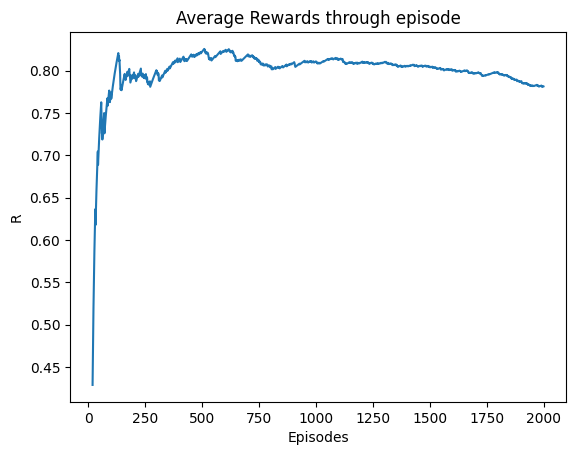

In [7]:
#R_total_np = np.array(R_total)
average_R_display(R_total)

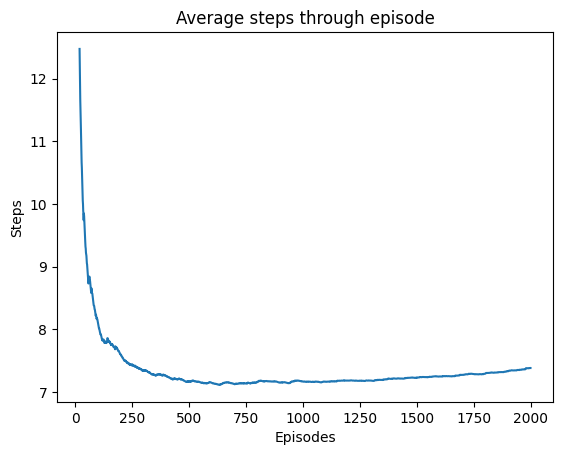

In [8]:
steps_plot(a_hist)

## Testing with different params and plotting results

In [9]:
colors= ['r', 'b', 'g', 'y', 'c']

alpha_list = [0.9, 0.6, 0.5, 0.3, 0.1]
gamma_list = [0.9, 0.7, 0.5, 0.4, 0.2]
R_alpha_list = []
R_gamma_list = []

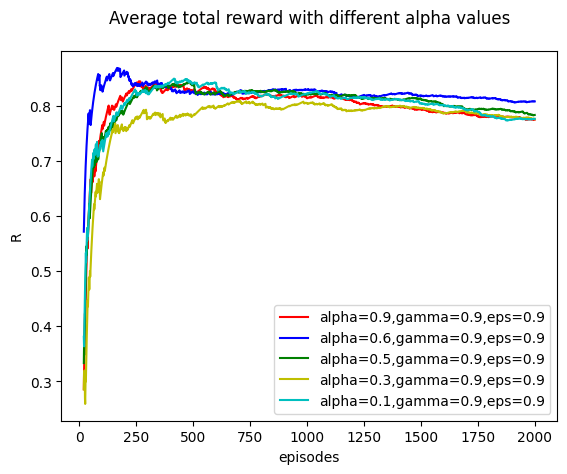

In [11]:
for alpha in alpha_list:
  Q_a = np.zeros(R.shape)
  a_hist_a, Q_hist_a, Rtot_a = q_learning_with_decay(R, Q_a, alpha, 0.9, 0.9, goal_state)
  R_alpha_list.append(Rtot_a)

for i in range(len(alpha_list)):
  Rtot_a = R_alpha_list[i]
  Rtot_avg_a = np.cumsum(Rtot_a) / np.arange(1, len(Rtot_a) + 1)
  plt.plot(np.arange(20, len(Rtot_avg_a)), Rtot_avg_a[20:], colors[i], label=f'alpha={alpha_list[i]},gamma=0.9,eps=0.9')
  plt.legend(loc="lower right")

plt.xlabel('episodes')
plt.ylabel('R')
plt.title('Average total reward with different alpha values', fontsize=12, pad=20)
plt.show()

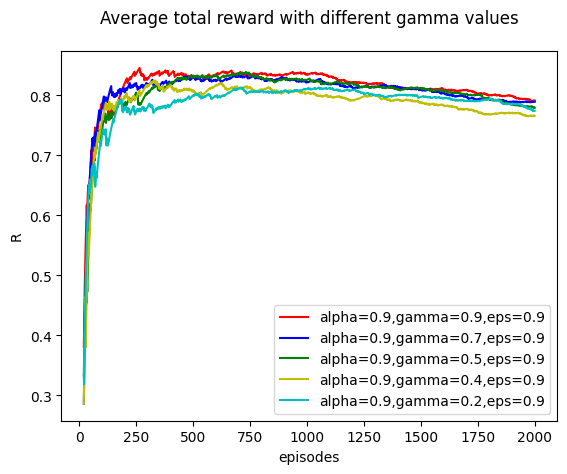

In [12]:
for gamma in gamma_list:
  Q_g = np.zeros(R.shape)
  a_hist_g, Q_hist_g, Rtot_g = q_learning_with_decay(R, Q_g, 0.9,gamma,0.9,goal_state)
  R_gamma_list.append(Rtot_g)

for i in range(len(gamma_list)):
  Rtot_g = R_gamma_list[i]
  Rtot_avg_g = np.cumsum(Rtot_g) / np.arange(1, len(Rtot_g) + 1)
  plt.plot(np.arange(20, len(Rtot_avg_g)), Rtot_avg_g[20:], colors[i], label=f'alpha=0.9,gamma={gamma_list[i]},eps=0.9')
  plt.legend(loc="lower right")


plt.xlabel('episodes')
plt.ylabel('R')
plt.title('Average total reward with different gamma values', fontsize=12, pad=20)
plt.show()

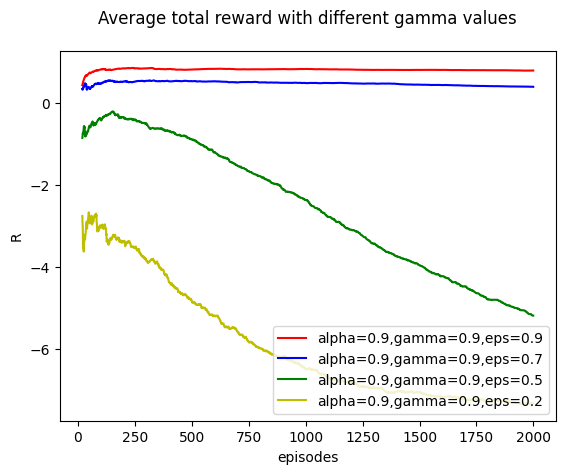

In [13]:
colors= ['r', 'b', 'g', 'y', 'c']

epsilon_list = [0.9, 0.7, 0.5, 0.2]
R_epsilon_list = []

for eps in epsilon_list:
  Q_e = np.zeros(R.shape)
  a_hist_e, Q_hist_e, Rtot_e = q_learning_with_decay(R, Q_e, 0.9,0.9,eps,goal_state)
  R_epsilon_list.append(Rtot_e)

for i in range(len(epsilon_list)):
  Rtot_e = R_epsilon_list[i]
  Rtot_avg_e = np.cumsum(Rtot_e) / np.arange(1, len(Rtot_e) + 1)
  plt.plot(np.arange(20, len(Rtot_avg_e)), Rtot_avg_e[20:], colors[i], label=f'alpha=0.9,gamma=0.9,eps={epsilon_list[i]}')
  plt.legend(loc="lower right")


plt.xlabel('episodes')
plt.ylabel('R')
plt.title('Average total reward with different gamma values', fontsize=12, pad=20)
plt.show()


## Different policy: Random policy

In [ ]:
def q_learning_random(R, Q, alpha, gamma, epsilon, goal_state, num_episodes=2000, max_timesteps=99):

    epsilon_decays = {'epsilon_threshold': 0.5, 'epsilon_decay1': 0.99999, 'epsilon_decay2': 0.9999}
    a_hist = []  # Store actions taken in each episode
    Q_hist = []  # Store Q-values at the end of each episode
    R_total = []  # Store total rewards for each episode

    for episode in range(num_episodes):
        s = 0
        a_episode = []  # Store actions taken in this episode
        #print("Starting state is '{}'".format(S[s]))

        total_reward = 0

        for timestep in range(max_timesteps):
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            #random policy
            a = np.random.choice(available_actions)

            # Store action
            a_episode.append(a)

            # Environment updating
            r = R[s,a]
            total_reward += r
            s_old = s
            s = a

            # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])

            if S[s] == goal_state:
                break

        #print('Episode {} finished. Q matrix values:\n{}'.format(episode,Q.round(1)))

        # Store results for this episode
        a_hist.append(a_episode)
        Q_hist.append(Q.copy())
        R_total.append(total_reward)

    return a_hist, Q_hist, R_total

In [ ]:
epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.99999, 'epsilon_decay2': 0.9999}
Q_new = np.zeros(R.shape)
goal_state = 'P'

# Learning params
alpha = 0.9
gamma = 0.9
epsilon = 1

a_hist, Q_hist, R_total = q_learning_random(R, Q_new, alpha, gamma, epsilon, goal_state)

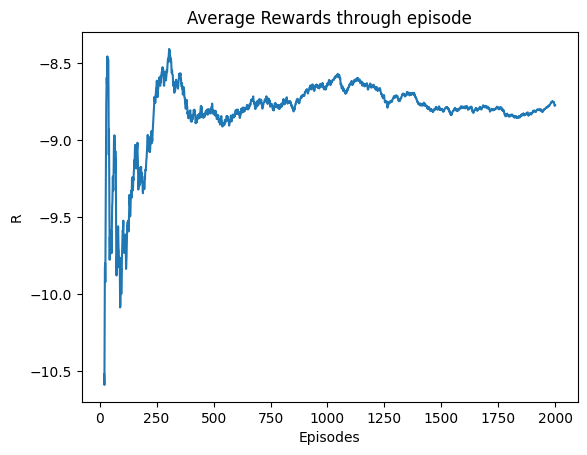

In [ ]:
average_R_display(R_total)

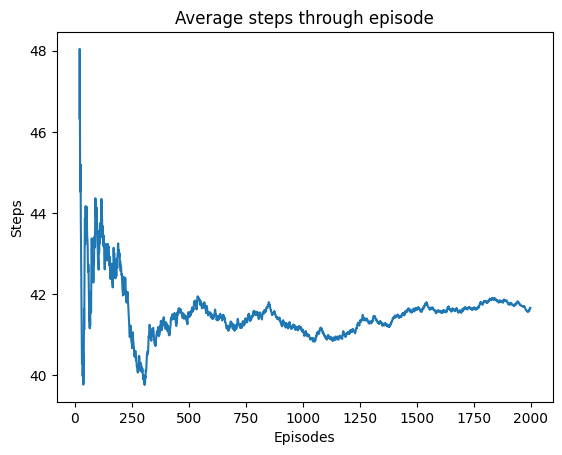

In [ ]:
steps_plot(a_hist)